In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datasets import load_dataset

In [2]:
# Load the dataset
dataset_cyclists = load_dataset('csv', data_files='dataset/cyclists.csv')
dataset_races = load_dataset('csv', data_files='dataset/races.csv')

# Convert to pandas DataFrames
df_cyclists = dataset_cyclists['train'].to_pandas()
df_races = dataset_races['train'].to_pandas()

## Cyclist

In [3]:
df_cyclists.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [4]:
df_cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [5]:
df_cyclists.shape

(6134, 6)

In [6]:
# check if there are strange values --> OK
df_cyclists[df_cyclists["birth_year"]=="?"]
df_cyclists[df_cyclists["height"]=="?"]
df_cyclists[df_cyclists["weight"]=="?"]
df_cyclists[df_cyclists["name"]=="?"]
df_cyclists[df_cyclists["nationality"]=="?"]
df_cyclists[df_cyclists["_url"]=="?"]

,_url,name,birth_year,weight,height,nationality


In [7]:
df_cyclists["birth_year"].unique()

array([1964., 1965., 1996., 1995., 1997., 1998., 1947., 1988., 1984.,
         nan, 1982., 1980., 1970., 1981., 1985., 1954., 1994., 1951.,
       1973., 1950., 1979., 1957., 1986., 1991., 1974., 1944., 1962.,
       2001., 1978., 1952., 1969., 1968., 1943., 1960., 1972., 1975.,
       1961., 1949., 1966., 1990., 1989., 1983., 1956., 1992., 1999.,
       2002., 1993., 1959., 1948., 1971., 1977., 1987., 1976., 1967.,
       1963., 2000., 1955., 1942., 1940., 2003., 1946., 1945., 1953.,
       1941., 1958., 1933., 1938., 2004., 1939., 1936., 1934., 1937.])

In [8]:
df_cyclists["birth_year"].value_counts()

birth_year
1964.0    145
1962.0    141
1970.0    140
1974.0    138
1975.0    133
         ... 
1937.0      4
1938.0      2
1934.0      2
1933.0      1
1936.0      1
Name: count, Length: 71, dtype: int64

In [9]:
df_cyclists["height"].unique()

array([ nan, 182., 189., 192., 171., 177., 191., 175., 178., 181., 172.,
       174., 180., 164., 170., 184., 185., 186., 190., 179., 193., 167.,
       173., 176., 183., 166., 187., 188., 195., 169., 198., 194., 168.,
       199., 204., 154., 165., 159., 160., 196., 162., 161., 163., 155.,
       158., 197., 202., 157., 200.])

In [10]:
df_cyclists["height"].value_counts()

height
180.0    277
178.0    226
183.0    193
181.0    181
175.0    169
182.0    165
185.0    161
176.0    154
184.0    152
179.0    137
177.0    133
174.0    129
173.0    120
186.0    107
190.0     97
170.0     90
187.0     85
172.0     80
188.0     77
171.0     67
189.0     48
169.0     46
191.0     37
192.0     34
168.0     24
167.0     23
193.0     22
164.0     20
194.0     17
195.0     13
165.0     13
196.0      7
197.0      6
166.0      6
160.0      4
198.0      4
159.0      3
162.0      3
199.0      2
161.0      2
163.0      2
154.0      1
204.0      1
155.0      1
158.0      1
202.0      1
157.0      1
200.0      1
Name: count, dtype: int64

In [11]:
df_cyclists["name"].unique()

array(['Bruno  Surra', 'Gérard  Rué', 'Jan  Maas', ..., 'Paolo  Alberati',
       'Jackson  Rodríguez', 'Ward  Vanhoof'], dtype=object)

In [12]:
df_cyclists["name"].value_counts() # duplicates ?

name
Jesús  López           2
Roman  Kreuziger       2
Alberto  Fernández     2
Antonio  Cabello       2
Andrea  Peron          2
                      ..
Raúl  Rota             1
Marco Van Der Hulst    1
Sandy  Casar           1
Melchor  Mauri         1
Ward  Vanhoof          1
Name: count, Length: 6127, dtype: int64

In [13]:
df_cyclists["nationality"].unique()

array(['Italy', 'France', 'Netherlands', 'Belgium', 'Spain',
       'United States', None, 'Norway', 'Russia', 'Poland', 'Germany',
       'Australia', 'Switzerland', 'Ireland', 'Denmark', 'Great Britain',
       'Colombia', 'South Africa', 'Argentina', 'New Zealand',
       'Lithuania', 'Portugal', 'Austria', 'Yugoslavia', 'Estonia',
       'Romania', 'Slovenia', 'Canada', 'Latvia', 'Luxembourg', 'Sweden',
       'Czech Republic', 'Slovakia', 'Morocco', 'Ukraine', 'Ethiopia',
       'Belarus', 'Venezuela', 'Japan', 'Mexico', 'Croatia', 'Kazakhstan',
       'Uruguay', 'Israel', 'Namibia', 'Eritrea', 'Costa Rica', 'Taiwan',
       'Azerbaijan', 'Hungary', 'Moldova', 'Panama', 'Finland',
       'Bulgaria', 'Serbia', 'Brazil', 'Iran', 'Greece', 'Chile',
       'Ecuador', 'China', 'Albania', 'Guatemala', 'Uzbekistan',
       'Algeria', 'Tunisia', 'Monaco', 'Rwanda', 'Dominican Republic',
       'Liechtenstein', 'Zimbabwe', 'Puerto Rico', 'Hongkong'],
      dtype=object)

In [14]:
df_cyclists["nationality"].value_counts()

nationality
Italy                 1029
Spain                  872
Belgium                869
France                 741
Netherlands            380
                      ... 
Dominican Republic       1
Liechtenstein            1
Zimbabwe                 1
Puerto Rico              1
Hongkong                 1
Name: count, Length: 72, dtype: int64

In [15]:
df_cyclists["weight"].unique()

array([ nan, 74. , 69. , 78. , 55. , 67. , 71.5, 73. , 60. , 65. , 71. ,
       62. , 63. , 59. , 83. , 76. , 70. , 80. , 72. , 79. , 61. , 68. ,
       64. , 82. , 56. , 77. , 66. , 75. , 58. , 53. , 57. , 91. , 81. ,
       88. , 85. , 84. , 86. , 67.5, 89. , 52. , 51. , 54. , 58.5, 48. ,
       90. , 63.5, 74.5, 66.5, 78.1, 77.5, 81.4, 50. , 87. , 62.5, 93. ,
       73.5, 79.5, 65.1, 92. , 94. ])

In [16]:
df_cyclists["weight"].value_counts()

weight
70.0    272
68.0    219
65.0    193
67.0    177
72.0    169
69.0    162
73.0    146
63.0    140
66.0    139
64.0    137
74.0    135
62.0    131
75.0    128
71.0    125
60.0     98
61.0     90
78.0     86
77.0     67
58.0     64
76.0     63
80.0     53
59.0     49
79.0     30
82.0     26
55.0     25
81.0     22
57.0     20
83.0     20
56.0     19
85.0     10
53.0      7
52.0      6
84.0      6
54.0      4
51.0      4
90.0      4
88.0      3
87.0      3
50.0      2
86.0      2
58.5      2
63.5      2
89.0      2
67.5      1
92.0      1
65.1      1
79.5      1
73.5      1
93.0      1
62.5      1
78.1      1
81.4      1
77.5      1
66.5      1
74.5      1
91.0      1
48.0      1
71.5      1
94.0      1
Name: count, dtype: int64

In [17]:
df_cyclists["_url"].unique()

array(['bruno-surra', 'gerard-rue', 'jan-maas', ..., 'paolo-alberati',
       'jackson-rodriguez', 'ward-vanhoof'], dtype=object)

In [18]:
df_cyclists["_url"].value_counts()

_url
bruno-surra               1
rossano-brasi             1
camilo-andres-suarez      1
marco-gilli               1
nelson-rodriguez-serna    1
                         ..
claudio-fasolo            1
raul-rota-rus             1
marco-van-der-hulst       1
sandy-casar               1
ward-vanhoof              1
Name: count, Length: 6134, dtype: int64

In [19]:
df_cyclists.describe()

,birth_year,weight,height
count,6121.000000,3078.000000,3143.000000
mean,1974.071884,68.658739,179.815145
std,15.535834,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


In [20]:
df_cyclists[df_cyclists["birth_year"]==2004.0] # okay

,_url,name,birth_year,weight,height,nationality
806,joshua-tarling,Joshua Tarling,2004.0,78.0,194.0,Great Britain
1795,jan-christen,Jan Christen,2004.0,60.0,183.0,Switzerland
3043,rafael-elvas-barbas,Rafael Barbas,2004.0,67.0,189.0,Portugal
3968,tiago-nunes,Tiago Nunes,2004.0,NaN,NaN,Portugal
5684,paul-magnier,Paul Magnier,2004.0,75.0,187.0,France


In [21]:
# check duplicates
dup_df_cyclist = df_cyclists[df_cyclists.duplicated(keep=False)] 

In [22]:
dup_df_cyclist # no dup rows for all the column

,_url,name,birth_year,weight,height,nationality


In [23]:
# check for the name
dup_df_cyclist = df_cyclists[df_cyclists.duplicated(subset=["name"], keep=False)] 

In [24]:
dup_df_cyclist # they are different person, no duplicates

,_url,name,birth_year,weight,height,nationality
347,andrea-peron-1,Andrea Peron,1971.0,70.0,183.0,Italy
1745,roman-kreuziger-sr,Roman Kreuziger,1965.0,NaN,NaN,Czech Republic
2235,alessandro-pozzi2,Alessandro Pozzi,1969.0,NaN,NaN,Italy
2601,roman-kreuziger,Roman Kreuziger,1986.0,65.0,183.0,Czech Republic
2682,andrea-peron,Andrea Peron,1988.0,70.0,178.0,Italy
2862,antonio-cabello-baena,Antonio Cabello,1990.0,67.0,179.0,Spain
2939,jesus-lopez23,Jesús López,1955.0,NaN,NaN,Spain
2953,alberto-fernandez-sainz,Alberto Fernández,1981.0,NaN,NaN,Spain
3238,antonio-cabello,Antonio Cabello,1956.0,NaN,NaN,Spain
4917,sergio-dominguez-rodriguez,Sergio Domínguez,1979.0,NaN,NaN,Spain


In [25]:
df_cyclists[df_cyclists.duplicated(subset=["_url"], keep=False)] # no dupilcates, rest has no sense

,_url,name,birth_year,weight,height,nationality


## Missing values

In [26]:
# check missing values
df_cyclists.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

In [27]:
# Check information about scott-davies in the other dataset to put some value in
df_cyclists[df_cyclists["_url"] == "scott-davies"]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,NaN,NaN,NaN,None


In [28]:
# unable to find meaningful information about the cyclist, so since it's 1 just delete him
scott_davies_df = df_races[df_races["cyclist"] == "scott-davies"]
scott_davies_df

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
2063,giro-d-italia/2019/stage-14,Giro d'Italia,80.0,100.0,131000.0,4187.0,4.0,896,NaN,2019-05-25 04:31:35,99,scott-davies,NaN,True,False,False,team-giant-shimano-2014,1752.0
6495,vuelta-a-espana/2020/stage-7,La Vuelta ciclista a España,80.0,100.0,159700.0,2657.0,2.0,692,NaN,2020-10-27 04:05:14,124,scott-davies,NaN,True,False,False,carrera-inoxpran-1985,1018.0
12865,amstel-gold-race/2018/result,Amstel Gold Race,225.0,500.0,263000.0,3496.0,2.0,1139,NaN,2018-04-15 06:39:57,96,scott-davies,NaN,False,False,False,liquigas-2007,290.0
12972,vuelta-a-espana/2020/stage-11,La Vuelta ciclista a España,80.0,100.0,170000.0,5098.0,5.0,692,NaN,2020-10-31 05:26:30,100,scott-davies,NaN,True,False,False,carrera-inoxpran-1985,1937.0
13349,paris-nice/2019/stage-3,Paris - Nice,50.0,60.0,200000.0,896.0,1.0,1099,NaN,2019-03-12 05:16:25,50,scott-davies,NaN,True,False,False,team-giant-shimano-2014,0.0
23038,giro-d-italia/2019/stage-16,Giro d'Italia,80.0,100.0,194000.0,5207.0,4.0,896,NaN,2019-05-28 05:58:48,71,scott-davies,NaN,True,False,False,team-giant-shimano-2014,1344.0
60389,vuelta-a-espana/2020/stage-4,La Vuelta ciclista a España,80.0,100.0,191700.0,1160.0,1.0,692,NaN,2020-10-23 03:54:11,134,scott-davies,NaN,True,False,False,carrera-inoxpran-1985,42.0
68791,giro-d-italia/2019/stage-9,Giro d'Italia,80.0,100.0,34800.0,723.0,3.0,896,NaN,2019-05-19 00:54:29,18,scott-davies,NaN,True,False,False,team-giant-shimano-2014,157.0
75497,giro-d-italia/2019/stage-18,Giro d'Italia,80.0,100.0,222000.0,1478.0,2.0,896,NaN,2019-05-30 05:04:24,138,scott-davies,NaN,True,False,False,team-giant-shimano-2014,500.0
132853,paris-nice/2019/stage-1,Paris - Nice,50.0,60.0,138500.0,1107.0,1.0,1099,NaN,2019-03-10 03:20:17,131,scott-davies,NaN,True,False,False,team-giant-shimano-2014,162.0


In [29]:
# delete the row
df_cyclists = df_cyclists[df_cyclists["_url"] != "scott-davies"]

plot distribution of attributes before and then after manage missing values to see if change drastically

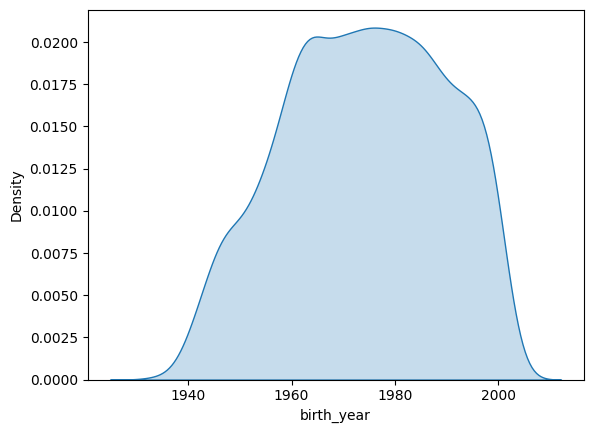

In [30]:
# Kernel Density Estimation
seaborn.kdeplot(df_cyclists["birth_year"], fill=True, label="birth_year")
plt.show()

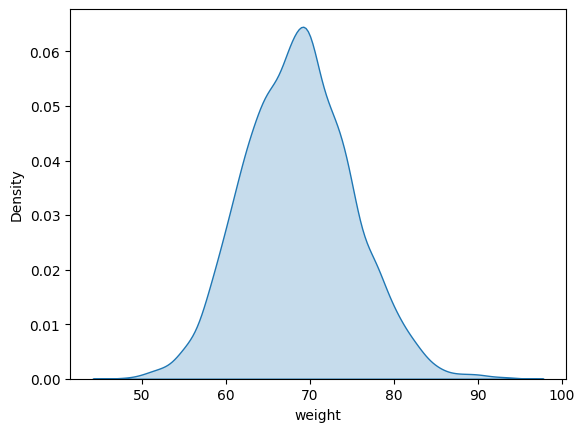

In [31]:
seaborn.kdeplot(df_cyclists["weight"], fill=True, label="weight")
plt.show()

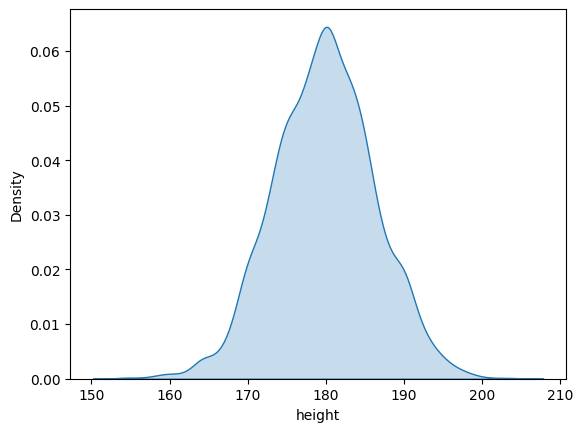

In [32]:
seaborn.kdeplot(df_cyclists["height"], fill=True, label="height")
plt.show()

## Compute optimal number of bins

In [84]:
# Sturges rule for approximately Normal distributions
def sturges_bin_count(df_cyclists):
    """Calculate optimal number of bins based on Sturges' rule"""
    return int(np.ceil(np.log2(len(df_cyclists)) + 1))

bins = sturges_bin_count(df_cyclists["column_name"])
print(f"Recommended number of bins: {bins}")

# Freedman-Diaconis Rule is better for data with outliers and skewed distributions
def freedman_diaconis_bin_count(data):
    """Calculate optimal number of bins based on Freedman-Diaconis rule"""
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr * len(data) ** (-1/3)
    return int(np.ceil((data.max() - data.min()) / bin_width))

bins = freedman_diaconis_bin_count(df["column_name"])
print(f"Recommended number of bins: {bins}")

NameError: name 'df' is not defined

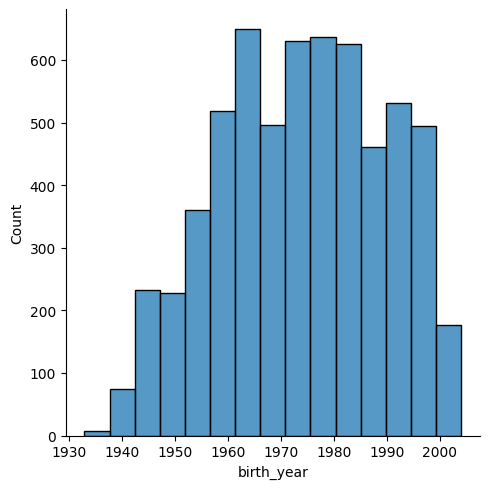

In [33]:
# birht year
seaborn.displot(df_cyclists,
                x="birth_year",
                kind="hist",
                row_order="desc",
                bins=15)

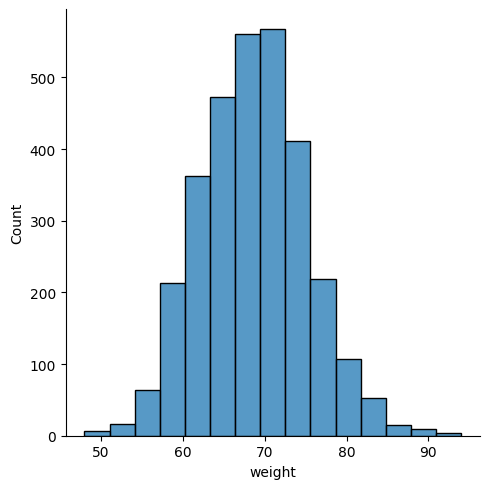

In [34]:
# weight
seaborn.displot(df_cyclists,
                x="weight",
                kind="hist",
                row_order="desc",
                bins=15)

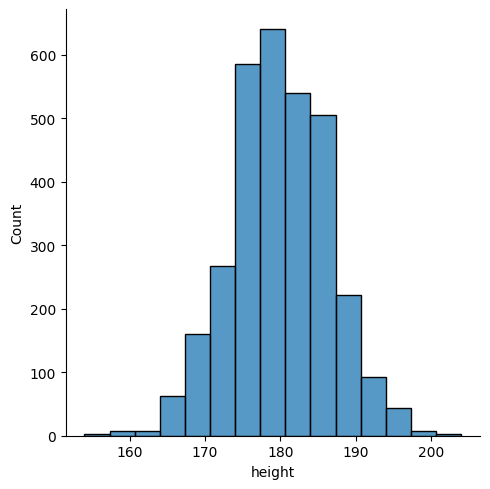

In [35]:
# height
seaborn.displot(df_cyclists,
                x="height",
                kind="hist",
                row_order="desc",
                bins=15)

## SimpleImputer for birth year
It seems good wrt the distribution. Since they are only 13, we keep that

In [37]:
# try simple imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit((df_cyclists[["birth_year"]]))
df_cyclists["birth_year"] = imputer.transform(df_cyclists[["birth_year"]]).squeeze()

In [38]:
df_cyclists.isnull().sum() # zero missing values for birth year

_url              0
name              0
birth_year        0
weight         3055
height         2990
nationality       0
dtype: int64

### Review distribution of birth year --> OKAY seems reasonably the same

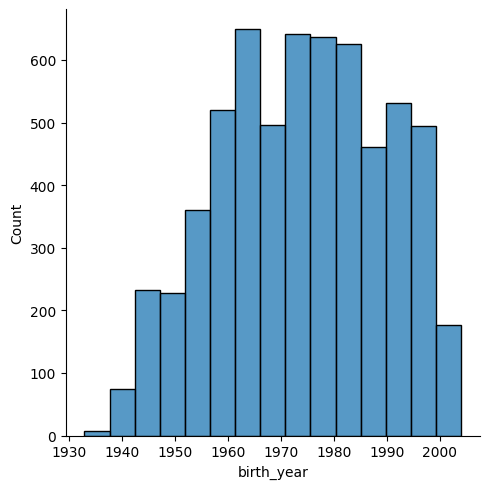

In [104]:
# review distribution of birth year --> OKAY seems reasonably the same
seaborn.displot(df_cyclists,
                x="birth_year",
                kind="hist",
                row_order="desc",
                bins=15)

# KNN imputer test for weight

In [108]:
# try simple imputer
from sklearn.impute import KNNImputer

# create test dataset for testing weight and height replacement with KNN
test_df_cyclists = df_cyclists
imputer = KNNImputer(n_neighbors=2,weights="distance")
imputer.fit((test_df_cyclists[["weight"]]))
test_df_cyclists["weight"] = imputer.transform(test_df_cyclists[["weight"]]).squeeze()

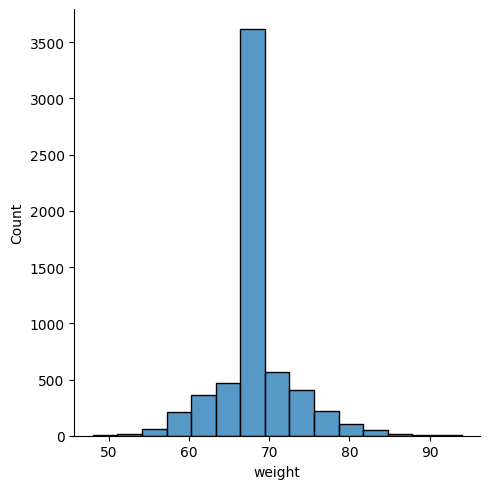

In [109]:
# review distribution of weight --> NOT GOOD 
seaborn.displot(test_df_cyclists,
                x="weight",
                kind="hist",
                row_order="desc",
                bins=15)

Flexibility of IterativeImputer
There are many well-established imputation packages in the R data science ecosystem: Amelia, mi, mice, missForest, etc. missForest is popular, and turns out to be a particular instance of different sequential imputation algorithms that can all be implemented with IterativeImputer by passing in different regressors to be used for predicting missing feature values.

Multiple vs. Single Imputation
In the statistics community, it is common practice to perform multiple imputations, generating, for example, m separate imputations for a single feature matrix. Each of these m imputations is then put through the subsequent analysis pipeline (e.g. feature engineering, clustering, regression, classification). The m final analysis results (e.g. held-out validation errors) allow the data scientist to obtain understanding of how analytic results may differ as a consequence of the inherent uncertainty caused by the missing values. The above practice is called multiple imputation.